Task 5: Binary Classification with Logistic Regression 
● Load the Breast Cancer Dataset from sklearn.datasets. 

● Train a logistic regression model to predict whether a tumor is 
benign or malignant. 

● Evaluate using: 

○ Accuracy 
○ Confusion Matrix 
○ Precision, Recall, F1-score 
○ ROC-AUC curve 

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

data = pd.read_csv('Breast_cancer_data.csv')
data


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [4]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [5]:
# sns.countplot(data,x='diagnosis')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [7]:
X = data.drop(columns='diagnosis')
y=data['diagnosis']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [10]:
y_pred = model.predict(x_test)

In [11]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9298245614035088

In [12]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[40,  3],
       [ 5, 66]], dtype=int64)

In [13]:
report = classification_report(y_test,y_pred)
report


'              precision    recall  f1-score   support\n\n           0       0.89      0.93      0.91        43\n           1       0.96      0.93      0.94        71\n\n    accuracy                           0.93       114\n   macro avg       0.92      0.93      0.93       114\nweighted avg       0.93      0.93      0.93       114\n'

Task 6: Threshold Tuning and Probability Interpretation 
● Predict the probability of the positive class. 

● Change the threshold (e.g., 0.3, 0.5, 0.7) and observe how the 
confusion matrix and F1-score change. 

● Plot the ROC curve and mark optimal threshold.

In [14]:
#Probability of positive class
y_proba = model.predict_proba(x_test)[:,1]

In [17]:
thresholds = [0.3,0.5,0.7]
for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    cm = confusion_matrix(y_test , y_pred_thresh)
    f1 = f1_score(y_test , y_pred_thresh)
    print(f"Threshold : {thresh}")
    print(f"Confusion Matrix :")
    print(cm)
    print(f"F1 Score : {f1}")

Threshold : 0.3
Confusion Matrix :
[[35  8]
 [ 1 70]]
F1 Score : 0.9395973154362416
Threshold : 0.5
Confusion Matrix :
[[40  3]
 [ 5 66]]
F1 Score : 0.9428571428571428
Threshold : 0.7
Confusion Matrix :
[[41  2]
 [ 5 66]]
F1 Score : 0.9496402877697842


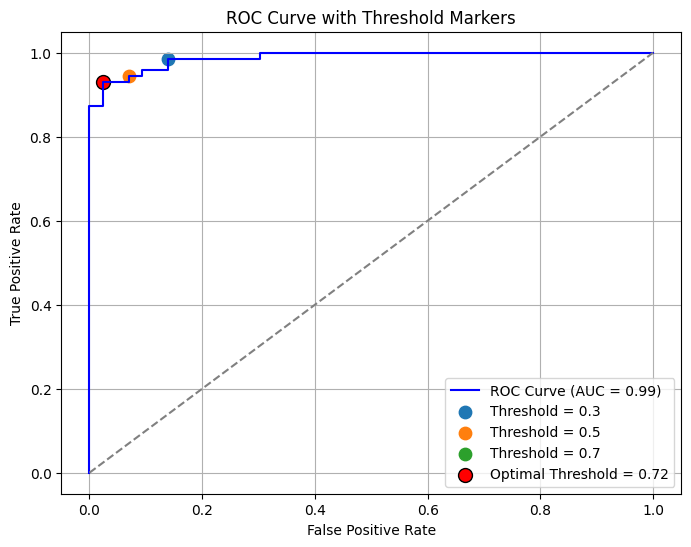

In [19]:
# Plot ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Find best threshold (closest to top-left)
best_index = np.argmax(tpr - fpr)
best_threshold = roc_thresholds[best_index]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Mark thresholds
for thresh in thresholds:
    idx = np.argmin(np.abs(roc_thresholds - thresh))
    plt.scatter(fpr[idx], tpr[idx], label=f"Threshold = {thresh}", s=80)

# Mark best threshold
plt.scatter(fpr[best_index], tpr[best_index], color='red', s=100, edgecolors='black', label=f"Optimal Threshold = {best_threshold:.2f}")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Threshold Markers')
plt.legend()
plt.grid(True)
plt.show()